Problem statement:

BC Finance company seeks to streamline its loan eligibility assessment process by implementing real-time automation.The task at hand involves leveraging a partial dataset provided by the company to devise an algorithm or model that accurately identifies distinct customer segments eligible for targeted loan offerings.


Hypothesis Generation:

We hypothesise that the likelihood that a client will receive a loan is more significantly impacted by Credit history and area they live in. If a client has credit history and lives in a ubran or semi-urban area, this could greatly effect whether a client will receive a loan.

In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from skimpy import clean_columns
from sklearn.metrics import mean_squared_error, r2_score
#Reading raw data and validation data from CSV files
r_csv= pd.read_csv(r".\raw_data.csv")
v_csv= pd.read_csv(r"validation.csv")
#Displays the raw data
r_csv

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
#Displays the validation data
v_csv

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [3]:
#Function that reprocesses the column names of the DataFrame
clean_columns(r_csv)

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Printing information about the raw data DataFrame
print(r_csv.info())
 
# Printing dimensions of the raw data DataFrame
print(f'Dimensions: {r_csv.shape[0]} rows and {r_csv.shape[1]} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
Dimensions: 614 rows and 13 columns


In [5]:
# Dropping 'Loan_ID' column from the raw data DataFrame and storing the result in br_csv
br_csv = r_csv.drop(columns=['Loan_ID'], inplace=False)
# Printing dimensions of the DataFrame after dropping 'Loan_ID' column
print(f'Dimensions: {br_csv.shape[0]} rows and {br_csv.shape[1]} columns')

Dimensions: 614 rows and 12 columns


In [6]:
# Displaying the first few rows of the DataFrame after dropping 'Loan_ID' column
r_csv.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Exploratory data analysis**

Univariate

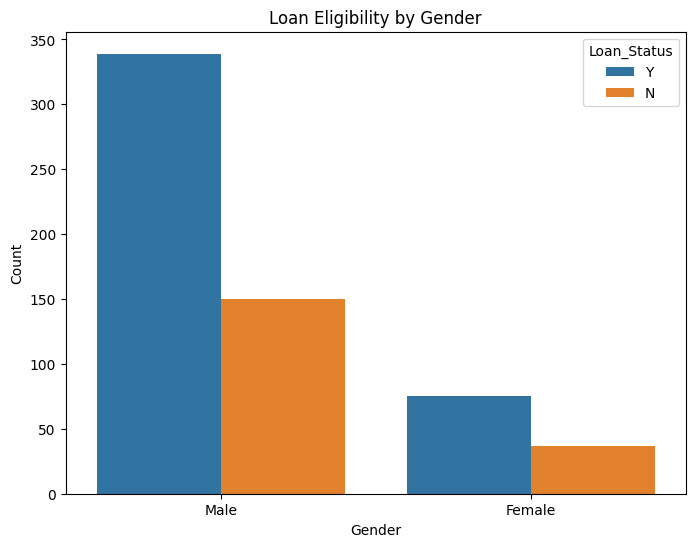

In [7]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
 
# Setting the figure size
plt.figure(figsize=(8, 6))
 
# Creating a countplot to visualize loan eligibility by gender
sns.countplot(x='Gender', hue='Loan_Status', data=r_csv)
 
# Adding title and labels to the plot
plt.title("Loan Eligibility by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
 
# Displaying the plot
plt.show()


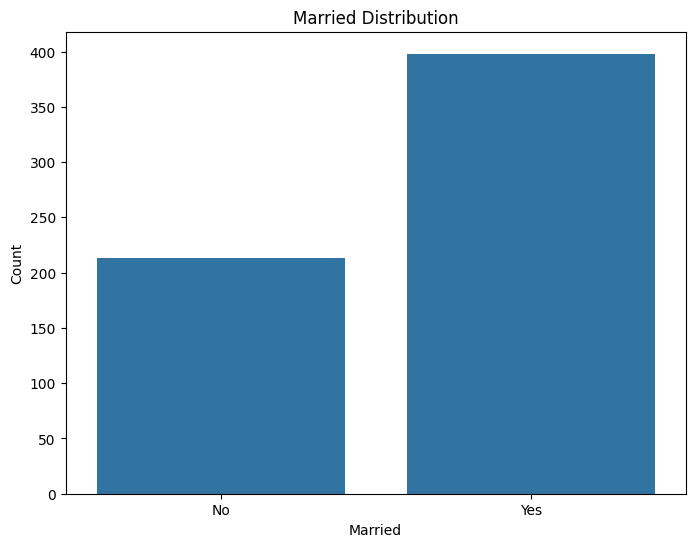

In [8]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Setting the figure size
plt.figure(figsize=(8, 6))
# Creating a countplot to visualize the distribution of 'Married' in the DataFrame 'data'
sns.countplot(x='Married', data=r_csv)
# Adding title and labels to the plot
plt.title("Married Distribution")
plt.xlabel("Married")
plt.ylabel("Count")
# Displaying the plot
plt.show()

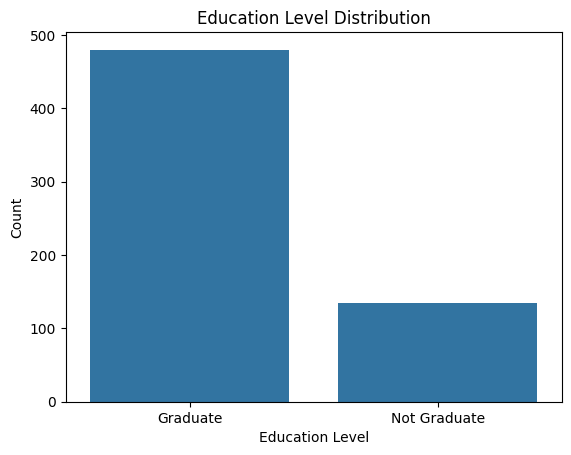

In [9]:

# Creating a countplot to visualize the distribution of 'Education' in the DataFrame 'data'
sns.countplot(x='Education', data=r_csv)
# Adding title and labels to the plot
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
# Displaying the plot
plt.show()

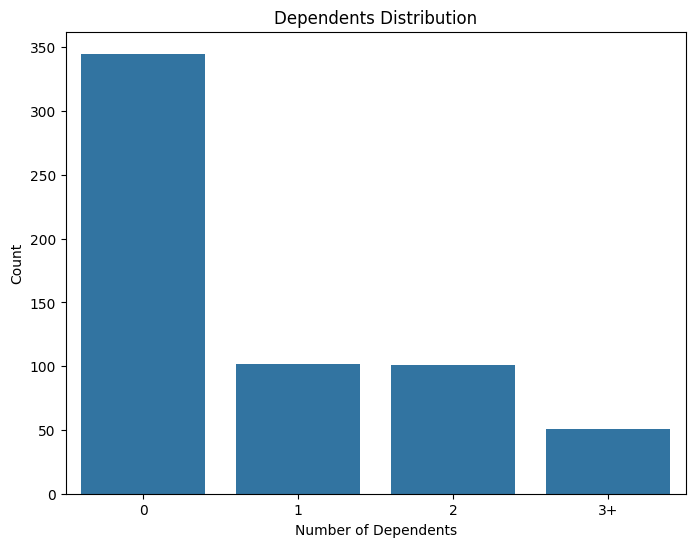

In [10]:
# Setting the figure size
plt.figure(figsize=(8, 6))
# Creating a countplot to visualize the distribution of 'Dependents' in the DataFrame 'data'
sns.countplot(x='Dependents', data=r_csv)
 
# Adding title and labels to the plot
plt.title("Dependents Distribution")
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
# Displaying the plot
plt.show()

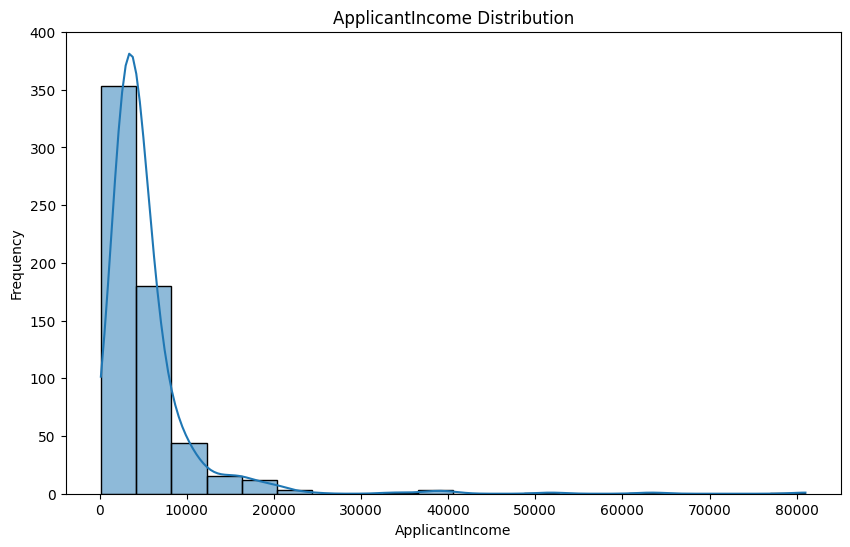

In [11]:
# Setting the figure size
plt.figure(figsize=(10, 6))
# Creating a histogram to visualize the distribution of 'ApplicantIncome' in the DataFrame 'data'
sns.histplot(r_csv['ApplicantIncome'], bins=20, kde=True)
 
# Adding title and labels to the plot
plt.title("ApplicantIncome Distribution")
plt.xlabel("ApplicantIncome")
plt.ylabel("Frequency")
 
# Displaying the plot
plt.show()


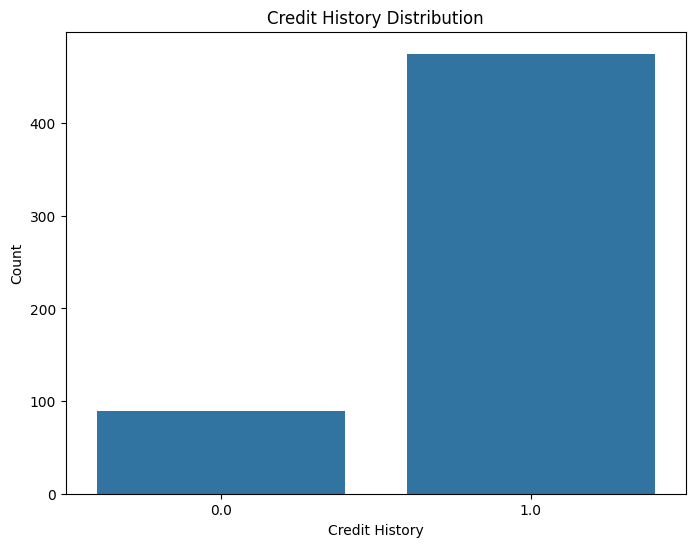

In [12]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
 
# Setting the figure size
plt.figure(figsize=(8, 6))
# Creating a countplot to visualize the distribution of 'Credit_History' in the DataFrame 'data'
sns.countplot(x='Credit_History', data=r_csv)
# Adding title and labels to the plot
plt.title("Credit History Distribution")
plt.xlabel("Credit History")
plt.ylabel("Count")
# Displaying the plot
plt.show()

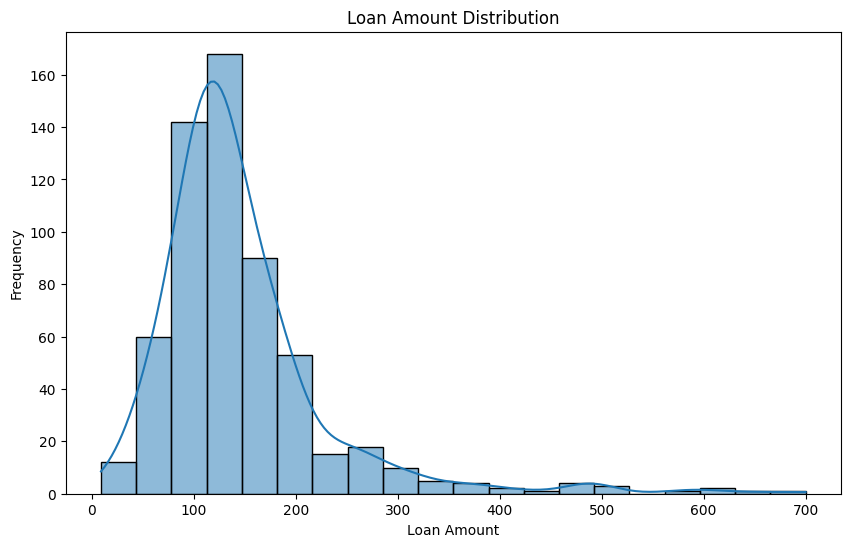

In [13]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
 
# Setting the figure size
plt.figure(figsize=(10, 6))
 
# Creating a histogram to visualize the distribution of 'LoanAmount' in the DataFrame 'data'
sns.histplot(r_csv['LoanAmount'], bins=20, kde=True)
 
# Adding title and labels to the plot
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
 
# Displaying the plot
plt.show()

Bivariate

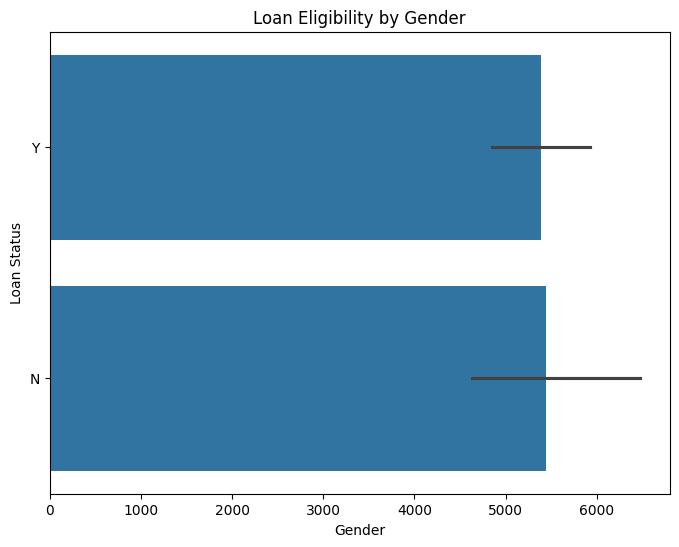

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='ApplicantIncome', y='Loan_Status', data=r_csv)
plt.title("Loan Eligibility by Gender")
plt.xlabel("Gender")
plt.ylabel("Loan Status")
plt.show()

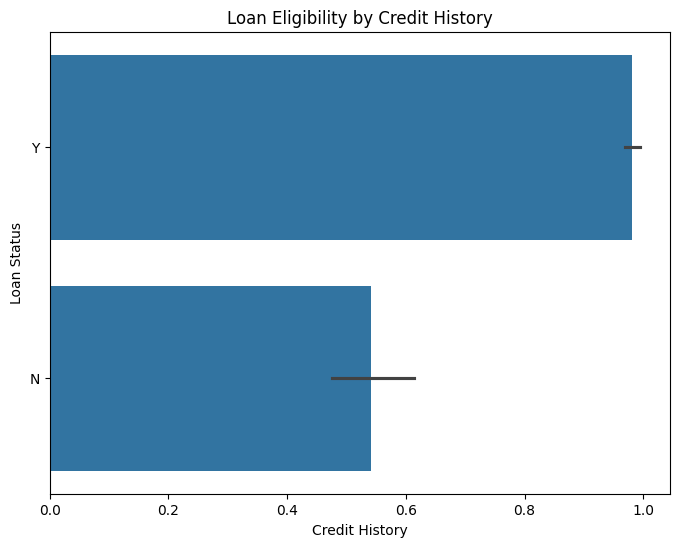

In [15]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
 
# Setting the figure size
plt.figure(figsize=(8, 6))
 
# Creating a bar plot to visualize loan eligibility by credit history
sns.barplot(x='Credit_History', y='Loan_Status', data=r_csv)
 
# Adding title and labels to the plot
plt.title("Loan Eligibility by Credit History")
plt.xlabel("Credit History")
plt.ylabel("Loan Status")
 
# Displaying the plot
plt.show()

**Missing value and outlier treatment**

Missing value treatment

In [16]:
# Calculating percentage of missing values for each column
missing_values = (
    r_csv.isnull().sum()/len(r_csv)*100
).astype(int)
 
# Printing header for the missing values table
print(f'Column\t\t\t% missing')
print(f'{"-"}'*35)
# Displaying the percentage of missing values for each column
missing_values

Column			% missing
-----------------------------------


Loan_ID              0
Gender               2
Married              0
Dependents           2
Education            0
Self_Employed        5
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           3
Loan_Amount_Term     2
Credit_History       8
Property_Area        0
Loan_Status          0
dtype: int32

In [17]:

# List of columns containing potential outliers
Outlier_table= ['LoanAmount','ApplicantIncome','CoapplicantIncome']
 
# Creating a DataFrame containing only the specified columns
Outlier_table = r_csv[Outlier_table]
 
# Printing information about the DataFrame
Outlier_table.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanAmount         592 non-null    float64
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 14.5 KB


In [18]:
# Importing necessary library
from sklearn.impute import SimpleImputer
 
# Create a SimpleImputer
imp_num = SimpleImputer(strategy='mean')
 
# Fit the imputer to the DataFrame and transform it
Outlier_table = pd.DataFrame(
    imp_num.fit_transform(Outlier_table),
    columns=Outlier_table.columns
)
 
# Displaying the resulting DataFrame with imputed values
Outlier_table


,LoanAmount,ApplicantIncome,CoapplicantIncome
0,146.412162,5849.0,0.0
1,128.000000,4583.0,1508.0
2,66.000000,3000.0,0.0
3,120.000000,2583.0,2358.0
4,141.000000,6000.0,0.0
...,...,...,...
609,71.000000,2900.0,0.0
610,40.000000,4106.0,0.0
611,253.000000,8072.0,240.0
612,187.000000,7583.0,0.0


Outlier treatment:

In [19]:
# Importing necessary libraries
import plotly.express as px
# Creating a boxplot using Plotly Express
fig = px.box(
    data_frame=Outlier_table,
    x='LoanAmount',
    orientation='h',
    title='Boxplot of the Target (LoanAmount) - With Outliers'
)
 
# Updating layout with axis title
fig.update_layout(xaxis_title='Target')
 
# Displaying the plot
fig.show()

In [20]:
# Iterating over specified columns
for col in ["ApplicantIncome","CoapplicantIncome","LoanAmount"]:
    # Calculating the 10th and 90th percentiles to define the range for outliers
    low, high = Outlier_table[col].quantile([0.1,0.9])
    # Identifying outliers within the defined range
    outliers = Outlier_table[col].between(low,high)
     # Filtering the DataFrame to exclude outliers
    Outlier_table = Outlier_table.loc[outliers]
   
# Printing information about the resulting DataFrame
Outlier_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 0 to 613
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanAmount         357 non-null    float64
 1   ApplicantIncome    357 non-null    float64
 2   CoapplicantIncome  357 non-null    float64
dtypes: float64(3)
memory usage: 11.2 KB


In [21]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import plotly.express as px
 
# Creating a boxplot using Plotly Express with the filtered Outlier_table
fig = px.box(
    data_frame=Outlier_table,
    x='LoanAmount',
    orientation='h',
    title='Boxplot of the Target (LoanAmount) - Without Outliers'
)
 
# Updating layout with axis title
fig.update_layout(xaxis_title='Loan Amount')
 
# Displaying the plot
fig.show()

**Developing our first model**

Encoding:

In [22]:
r_csv = r_csv.dropna()

In [23]:
r_csv.isnull().sum()/len(r_csv)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [24]:
from category_encoders import OneHotEncoder

In [28]:
# instantiate the encoder and specify columns to encode
ohe = OneHotEncoder(
    use_cat_names=True, 
    cols=['Gender','Married','Education','Self_Employed','Property_Area']
)

# Transform data
encoded_r = ohe.fit_transform(r_csv)

# Data is analysis-ready
encoded_r.head()

,Loan_ID,Gender_Male,Gender_Female,Married_Yes,Married_No,Dependents,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Urban,Property_Area_Semiurban,Loan_Status
1,LP001003,1,0,1,0,1,1,0,1,0,4583,1508.0,128.0,360.0,1.0,1,0,0,N
2,LP001005,1,0,1,0,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,1,0,Y
3,LP001006,1,0,1,0,0,0,1,1,0,2583,2358.0,120.0,360.0,1.0,0,1,0,Y
4,LP001008,1,0,0,1,0,1,0,1,0,6000,0.0,141.0,360.0,1.0,0,1,0,Y
5,LP001011,1,0,1,0,2,1,0,0,1,5417,4196.0,267.0,360.0,1.0,0,1,0,Y


In [29]:
label = 'Loan_Status'
X = encoded_r.drop(columns=[label], inplace=False)
y = encoded_r[label]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shape of splitted data
print(
    f'Training dataset \
    \nX_train: {X_train.shape[0]/len(X)*100:.0f}% \ny_train: {y_train.shape[0]/len(X)*100:.0f}% \
    \n\nValidation dataset \
    \nX_val: {X_val.shape[0]/len(X)*100:.0f}% \ny_val: {y_val.shape[0]/len(X)*100:.0f}%'
)

Training dataset     
X_train: 80% 
y_train: 80%     

Validation dataset     
X_val: 20% 
y_val: 20%


In [31]:
acc_baseline = y_train.value_counts(normalize=True).max()

# Print the benchmark
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.69


In [32]:
# Model pipeline
from sklearn.pipeline import make_pipeline

# Data Scaling
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler

# Three models selected
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score

In [33]:
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=1000)
)
# Fit model to training data
model_lr.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Loan_ID', 'Dependents'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [34]:
lr_train_acc = model_lr.score(X_train, y_train)
lr_val_acc = model_lr.score(X_val, y_val)

print("Logistic Regression, Training Accuracy Score:", lr_train_acc)
print("Logistic Regression, Validation Accuracy Score:", lr_val_acc)

Logistic Regression, Training Accuracy Score: 0.8177083333333334
Logistic Regression, Validation Accuracy Score: 0.8229166666666666


In [35]:

model_lr.predict(X_val)

array(['Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [36]:
y_train_pred_proba = model_lr.predict_proba(X_val)
print(y_train_pred_proba[:5])

[[0.17126314 0.82873686]
 [0.1958981  0.8041019 ]
 [0.23806818 0.76193182]
 [0.83006513 0.16993487]
 [0.16577076 0.83422924]]
